In [181]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
rawdata_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\01_raw"
reporting_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\03_reporting" 
intermediate_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\02_intermediate"

In [183]:
## pulling Feature Engineered Data
data = pd.read_csv(f"{intermediate_loc}\\feature_engineered_data.csv")
data.head(5)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,0.305667,0.267690,0.6,1,1,0.2,1.00,0.666667,0.75,1,...,1,0,0,0,0,0,0,0,0,0
1,0.223561,0.254222,0.4,1,0,0.0,0.50,0.000000,1.00,1,...,1,0,0,0,0,0,0,0,0,0
2,0.141455,0.125312,0.2,0,1,0.8,1.00,0.666667,0.50,0,...,1,0,0,0,0,0,0,0,0,0
3,0.141455,0.106072,0.2,1,1,0.4,0.75,1.000000,0.50,1,...,0,0,1,0,0,0,0,0,0,0
4,0.159304,0.132256,0.4,1,0,0.0,1.00,1.000000,0.75,0,...,0,0,0,0,1,0,0,0,0,0


In [184]:
data = data.fillna(0)

In [188]:
def check_sparsity(df):
    """
    Calculate and display the sparsity of a DataFrame.
    
    Sparsity is measured by counting the number of zero and non-zero elements,
    along with their respective percentages.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame for which sparsity is to be calculated.
        
    Returns
    -------
    None
        Prints the total elements, number of zeros, number of non-zeros, 
        and their percentages.
    """
    total_elements = df.size
    zero_count = (df == 0).sum().sum()
    non_zero_count = total_elements - zero_count

    zero_percentage = (zero_count / total_elements) * 100
    non_zero_percentage = (non_zero_count / total_elements) * 100

    print(f"Total Elements: {total_elements}")
    print(f"Zero Elements: {zero_count} ({zero_percentage:.2f}%)")
    print(f"Non-Zero Elements: {non_zero_count} ({non_zero_percentage:.2f}%)")

In [186]:
sparsity = check_sparsity(data)
sparsity

Total Elements: 6224084
Zero Elements: 4197149 (67.43%)
Non-Zero Elements: 2026935 (32.57%)


## Random Train-Test Data Splitting Function

##### This function randomly splits a dataset into training and testing subsets. It is intended for use with non-temporal data, where random splitting is appropriate.

#### Parameters:
##### df (pd.DataFrame): The dataset to be split.

##### test_size (float, default = 0.3): Proportion of the dataset to include in the test split. (e.g., 0.3 indicates 30% test data)

##### random_state (int or None, default = None): Controls the randomness for reproducibility. If set to an integer, the split can be reproduced.

#### Returns:
##### train_df (pd.DataFrame): Training subset of the original dataframe.

##### test_df (pd.DataFrame): Testing subset of the original dataframe.

#### This would split the original dataset (df) into two parts: 70% training data and 30% testing data, ensuring reproducibility due to the fixed random state (42).

In [108]:
## Randomly splitting the data into train-test-split

# Since this data is not a temporal data, so we can split the data randomly into test and train

def split_data(df, test_size = 0.3, random_state = None):
    train_df, test_df = train_test_split(df, test_size = test_size, random_state = random_state)
    return train_df, test_df

In [109]:
train_df, test_df = split_data(data, test_size = 0.3, random_state = 2)

In [110]:
train_df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
56745,0.112896,0.113266,0.6,1,0,0.6,0.50,0.333333,0.25,1,...,0,0,0,0,0,0,0,0,0,1
21165,0.168675,0.144427,0.4,1,1,0.6,0.50,0.333333,1.00,1,...,1,0,0,0,0,0,0,0,0,0
40812,0.427041,0.341305,0.4,1,0,0.4,0.00,0.000000,1.00,1,...,0,0,0,0,0,0,0,0,0,0
7665,0.228023,0.194494,0.2,0,0,0.2,1.00,0.666667,0.75,0,...,0,0,0,0,0,0,0,0,0,0
30624,0.324409,0.357157,0.2,1,0,0.4,0.75,1.000000,0.75,1,...,0,0,0,0,0,0,0,0,0,0


In [111]:
train_df.shape

(42299, 103)

In [112]:
## Checking null values

null_summary = train_df.isnull().sum().reset_index()
null_summary.columns = ['Column_Name', 'Missing_Values']
null_summary = null_summary[null_summary['Missing_Values'] > 0]  # Optional: only show columns with missing values
print(null_summary)

Empty DataFrame
Columns: [Column_Name, Missing_Values]
Index: []


In [113]:
test_df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
32661,0.061580,0.077797,0.4,1,1,0.4,0.50,1.000000,0.25,1,...,0,0,0,1,0,0,0,0,0,0
60146,0.054886,0.073908,0.4,0,0,0.8,0.75,1.000000,0.75,0,...,1,0,0,0,0,0,0,0,0,0
13569,0.286479,0.330764,0.4,1,1,0.2,0.75,1.000000,1.00,1,...,0,0,0,0,0,0,0,0,0,0
19562,0.470326,0.468227,0.8,1,0,0.6,0.75,0.333333,0.50,1,...,0,0,0,1,0,0,0,0,0,0
59433,0.358768,0.304790,0.4,0,0,0.6,1.00,0.666667,0.50,1,...,0,0,0,0,0,0,0,0,1,0


In [114]:
test_df.shape

(18129, 103)

In [115]:
null_summary = test_df.isnull().sum().reset_index()
null_summary.columns = ['Column_Name', 'Missing_Values']
null_summary = null_summary[null_summary['Missing_Values'] > 0]  # Optional: only show columns with missing values
print(null_summary)

Empty DataFrame
Columns: [Column_Name, Missing_Values]
Index: []


## Decision Tree Model Training Function

##### This function trains a Decision Tree regression model using the provided training dataset and response variable. After training, it provides a brief summary of the trained model, including its depth and the number of leaves.

#### Parameters:
##### train_df (pd.DataFrame): Training dataset containing predictor variables and the response variable.

##### response_variable (str): Name of the target variable column in the dataset.

##### max_depth (int or None, default = None): Maximum depth allowed for the tree. If set to None, the tree expands until leaves are pure or contain minimal data points.

##### random_state (int or None, default = None): Controls the randomness of the tree growth process for reproducibility.

#### Returns:
##### model (DecisionTreeRegressor): The trained decision tree regression model.

##### summary (str): A string summarizing the depth of the trained tree and the total number of leaves.

In [116]:
## Training a decision tree model on the training data and returns a summary

def train_decision_tree(train_df, response_variable, max_depth = None, random_state = None):
    
    x_train = train_df.drop(columns = [response_variable])
    y_train = train_df[response_variable]

    model = DecisionTreeRegressor(max_depth = max_depth, random_state = random_state)
    model.fit(x_train, y_train)

    summary = f"Depth: {model.get_depth()}, Number of leaves: {model.get_n_leaves()}"
    return model, summary

In [117]:
model, summary = train_decision_tree(train_df, "cost", max_depth = 10, random_state = 4)

In [118]:
model

DecisionTreeRegressor(max_depth=10, random_state=4)

In [119]:
summary

'Depth: 10, Number of leaves: 136'

In [120]:
## Imp Understanding: In Regression we use RMSE, R2, F-statistics mostly

## Decision Tree Model Training and Testing Function

##### This function trains a Decision Tree regression model on provided training data and evaluates its predictive performance on test data. The evaluation metrics provided are the Root Mean Squared Error (RMSE) and R-squared (R²).

#### Parameters:
##### train_df (pd.DataFrame): Training dataset containing predictor variables and the response variable.

##### test_df (pd.DataFrame): Test dataset used to evaluate the model, must have the same structure as the training dataset.

##### response_variable (str): Name of the target variable column in both datasets.

##### max_depth (int or None, default=None): Maximum allowed depth of the decision tree. If None, the tree will grow until all leaves are pure or contain minimal data points.

##### random_state (int or None, default=None): Controls randomness during the training process to ensure reproducibility.

#### Returns:
##### model (DecisionTreeRegressor): The trained decision tree regression model.

##### summary (str): A brief summary showing the depth and total number of leaves of the trained tree.

##### rmse (float): Root Mean Squared Error indicating the average prediction error on the test set.

##### r_squared (float): R² value indicating the proportion of variance explained by the model.


#### This function simplifies the entire process of training, predicting, and evaluating a decision tree model.

In [121]:
## Test Data:

def call_decision_tree(train_df, test_df, response_variable, max_depth = None, random_state = None):
    
    x_train = train_df.drop(columns = [response_variable])
    y_train = train_df[response_variable]
    x_test = test_df.drop(columns = [response_variable])
    y_test = test_df[response_variable]

    model = DecisionTreeRegressor(max_depth = max_depth, random_state = random_state)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    summary = f"Depth: {model.get_depth()}, Number of leaves: {model.get_n_leaves()}"
    return model, summary, rmse, r_squared

## Decision Tree Model Training and Evaluation (with varying max depth)

##### This code trains and evaluates a Decision Tree regression model for predicting the variable "cost". It specifically demonstrates the case where the tree is trained with a maximum depth parameter within the range of 8 to 22. Adjusting the max_depth parameter allows evaluation of how tree complexity affects model performance.

#### Parameters Used:
##### train_df (pd.DataFrame): Training dataset.

##### test_df (pd.DataFrame): Testing dataset.

##### response_variable (str): "cost" — the column predicted by the model.

##### max_depth (int): Set within the range of 8 to 22, explicitly chosen here as 10 to control tree complexity.

##### random_state (int): 4 — ensures reproducibility.

#### Returns:
##### model: Trained Decision Tree regression model (DecisionTreeRegressor).

##### summary: Summary string showing tree depth and number of leaves.

##### rmse: Root Mean Squared Error, indicating average prediction error.

##### r_squared: R² value, reflecting the proportion of variance explained.

In [122]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 10, random_state = 4)

In [123]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=10, random_state=4),
 'Depth: 10, Number of leaves: 136',
 0.2217799366005638,
 0.4636277635437285)

In [124]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 9, random_state = 4)

In [125]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=9, random_state=4),
 'Depth: 9, Number of leaves: 105',
 0.23364979244722758,
 0.40467711310831744)

In [126]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 8, random_state = 4)

In [127]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=8, random_state=4),
 'Depth: 8, Number of leaves: 79',
 0.2458743731192094,
 0.34075277364598755)

In [128]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 11, random_state = 4)

In [129]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=11, random_state=4),
 'Depth: 11, Number of leaves: 167',
 0.21035289401277,
 0.5174761740484197)

In [130]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 12, random_state = 4)

In [131]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=12, random_state=4),
 'Depth: 12, Number of leaves: 180',
 0.20407674758719713,
 0.5458400552391507)

In [132]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 13, random_state = 4)

In [133]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=13, random_state=4),
 'Depth: 13, Number of leaves: 203',
 0.19601003442327367,
 0.5810343768220799)

In [134]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 14, random_state = 4)

In [135]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=14, random_state=4),
 'Depth: 14, Number of leaves: 238',
 0.18741775822727388,
 0.6169607683200602)

In [136]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 15, random_state = 4)

In [137]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=15, random_state=4),
 'Depth: 15, Number of leaves: 281',
 0.18127139209837098,
 0.6416723511828075)

In [138]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 16, random_state = 4)

In [139]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=16, random_state=4),
 'Depth: 16, Number of leaves: 323',
 0.17446275130127603,
 0.6680847443554548)

In [140]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 17, random_state = 4)

In [141]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=17, random_state=4),
 'Depth: 17, Number of leaves: 347',
 0.16957143332115754,
 0.6864353023565447)

In [142]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 18, random_state = 4)

In [143]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=18, random_state=4),
 'Depth: 18, Number of leaves: 368',
 0.16407787297233592,
 0.706423144272798)

In [144]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 19, random_state = 4)

In [145]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=19, random_state=4),
 'Depth: 19, Number of leaves: 376',
 0.15333833960174692,
 0.7435968876975758)

In [146]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 20, random_state = 4)

In [147]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=20, random_state=4),
 'Depth: 20, Number of leaves: 415',
 0.14577015263583223,
 0.7682824131510877)

In [148]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 21, random_state = 4)

In [149]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=21, random_state=4),
 'Depth: 21, Number of leaves: 447',
 0.13584264760229664,
 0.7987693848034207)

In [150]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 22, random_state = 4)

In [151]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=22, random_state=4),
 'Depth: 22, Number of leaves: 453',
 0.12980709409483765,
 0.8162536861226289)

## Evaluating Decision Tree Performance Over Multiple Depths

##### This function evaluates a Decision Tree regression model's performance across a range of maximum depths (from 8 to 22 inclusive). It calculates performance metrics—Root Mean Squared Error (RMSE) and R-squared (R²)—for each specified depth, allowing comparison to identify the optimal tree depth.

#### Parameters:
##### train_df (pd.DataFrame): Training dataset.

##### test_df (pd.DataFrame): Testing dataset.

##### response_variable (str): Name of the target variable column to predict.

##### random_state (int or None, default=None): Controls randomness for reproducibility.

#### Returns:
##### pd.DataFrame: A DataFrame containing:

##### max_depth: The maximum depth used for training each decision tree.

##### rmse: Root Mean Squared Error for predictions at each depth.

##### r_squared: R-squared (R²) for predictions at each depth.

In [152]:
## Evaluating Decision Tree

def evaluate_decison_tree(train_df, test_df, response_variable, random_state = None):
    results = []
    for max_depth in range(8, 23):
        _, _, rmse, r_squared = call_decision_tree(train_df, test_df, response_variable, max_depth, random_state)
        results.append({"max_depth": max_depth, "rmse": rmse, "r_squared": r_squared})

    return pd.DataFrame(results)

In [153]:
results = evaluate_decison_tree(train_df, test_df, "cost", random_state = 4)

In [154]:
results

,max_depth,rmse,r_squared
0,8,0.245874,0.340753
1,9,0.233650,0.404677
2,10,0.221780,0.463628
3,11,0.210353,0.517476
4,12,0.204077,0.545840
5,13,0.196010,0.581034
6,14,0.187418,0.616961
7,15,0.181271,0.641672
8,16,0.174463,0.668085
9,17,0.169571,0.686435


#### The above output clearly summarizes how predictive performance changes as the depth of the Decision Tree varies, aiding in choosing the most appropriate complexity for the model.

## Plotting Decision Tree Evaluation Metrics

##### This function creates a line plot to visualize how the Decision Tree model’s performance metrics—Root Mean Squared Error (RMSE) and R-squared (R²)—change with varying maximum tree depths. The visualization helps in easily identifying the optimal depth of the decision tree model.

#### Parameters:
##### results_df (pd.DataFrame):
##### DataFrame containing at least the following columns:

##### max_depth: Depth of the decision tree.

##### rmse: Corresponding RMSE values.

##### r_squared: Corresponding R² values.

#### Functionality:
##### Creates a plot with two curves:

##### RMSE (blue line with circles)

##### R-squared (red line with squares)

##### Sets appropriate labels and titles for clarity.

##### Adds a grid and legend for better readability.

In [155]:
## Visualizing

def plot_results(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df["max_depth"], results_df["rmse"], marker='o', label='RMSE', color='b')
    plt.plot(results_df["max_depth"], results_df["r_squared"], marker='s', label='R-squared', color='r')
    plt.xlabel("Max Depth")
    plt.ylabel("Metric Value")
    plt.title("Decision Tree Performance: RMSE and R-squared vs Max Depth")
    plt.legend()
    plt.grid()
    plt.show()

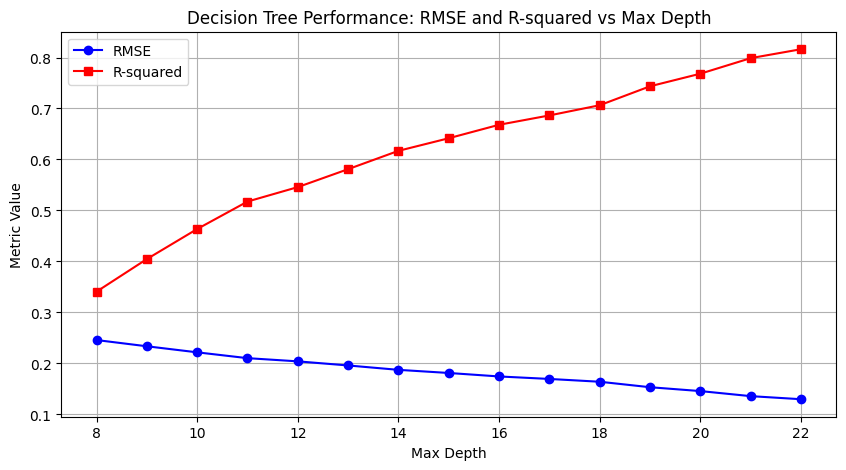

In [156]:
viz = plot_results(results_df = results)
viz

### Visualization Outcome:
##### X-axis: Maximum Depth of Decision Tree (max_depth)

##### Y-axis: Value of RMSE and R-squared metrics

##### Clear identification of performance trends with increasing depth, aiding in model tuning decisions.

## Random Forest

In [157]:
def call_random_forest(train_df, test_df, response_variable,
                       random_state=None, max_depth=None, n_estimators=None):
    """
    Train a Random Forest Regressor and evaluate its performance.

    This function splits the input training and testing DataFrames into
    features and target variables based on the specified response variable.
    It then trains a Random Forest Regressor and evaluates it using RMSE 
    and R-squared metrics on the test set.

    Parameters
    ----------
    train_df : pandas.DataFrame
        The training dataset containing features and response variable.
    test_df : pandas.DataFrame
        The testing dataset containing features and response variable.
    response_variable : str
        The name of the column to be predicted.
    random_state : int, optional
        Random seed for reproducibility (default is None).
    max_depth : int, optional
        The maximum depth of the tree (default is None).
    n_estimators : int, optional
        The number of trees in the forest (default is None).

    Returns
    -------
    rf : RandomForestRegressor
        The trained Random Forest Regressor model.
    rmse : float
        Root Mean Squared Error of the model on the test set.
    r_squared : float
        R-squared (coefficient of determination) of the model on the test set.
    """
    # Split into features and target
    x_train = train_df.drop(columns=[response_variable])
    y_train = train_df[response_variable]
    x_test = test_df.drop(columns=[response_variable])
    y_test = test_df[response_variable]

    # Initialize and train Random Forest Regressor
    rf = RandomForestRegressor(
        random_state=random_state,
        max_depth=max_depth,
        n_estimators=n_estimators
    )
    rf.fit(x_train, y_train)

    # Predict on test set
    preds = rf.predict(x_test)

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r_squared = r2_score(y_test, preds)

    return rf, rmse, r_squared

In [158]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 2, n_estimators = 1000)

In [159]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=4),
 0.2936131434583558,
 0.059902786726942825)

In [160]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [161]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 5, n_estimators = 1000)

In [162]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=4),
 0.2622929940669216,
 0.2497687311122394)

In [163]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 8, n_estimators = 1000)

In [164]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=4),
 0.22927132093031422,
 0.4267801168800234)

In [165]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 10, n_estimators = 1000)

In [166]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=4),
 0.2019902348933906,
 0.5550793854590681)

In [167]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 13, n_estimators = 1000)

In [168]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=13, n_estimators=1000, random_state=4),
 0.17137682288748,
 0.679722850531671)

In [169]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 16, n_estimators = 1000)

In [170]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=4),
 0.1480396147327147,
 0.7610111319042041)

In [171]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 18, n_estimators = 1000)

In [172]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=18, n_estimators=1000, random_state=4),
 0.13286191148693127,
 0.8075035287403723)

In [173]:
## Evaluating Random Forest

def evaluate_random_forest(train_df, test_df, response_variable, random_state = None, n_estimators = None):
    results = []
    for max_depth in range(2, 19):
        print(f"Number of loop in {max_depth}")
        rf, rmse, r_squared = call_random_forest(train_df, test_df, response_variable, random_state, max_depth, n_estimators)
        results.append({"max_depth": max_depth, "rmse": rmse, "r_squared": r_squared})

    return pd.DataFrame(results)

In [174]:
results = evaluate_random_forest(train_df, test_df, "cost", random_state = 4, n_estimators = 1000)

Number of loop in 2
Number of loop in 3
Number of loop in 4
Number of loop in 5
Number of loop in 6
Number of loop in 7
Number of loop in 8
Number of loop in 9
Number of loop in 10
Number of loop in 11
Number of loop in 12
Number of loop in 13
Number of loop in 14
Number of loop in 15
Number of loop in 16
Number of loop in 17
Number of loop in 18


In [175]:
## Visualizing

def plot_results(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df["max_depth"], results_df["rmse"], marker='o', label='RMSE', color='b')
    plt.plot(results_df["max_depth"], results_df["r_squared"], marker='s', label='R-squared', color='r')
    plt.xlabel("Max Depth")
    plt.ylabel("Metric Value")
    plt.title("Random Forest Performance: RMSE and R-squared vs Max Depth")
    plt.legend()
    plt.grid()
    plt.show()

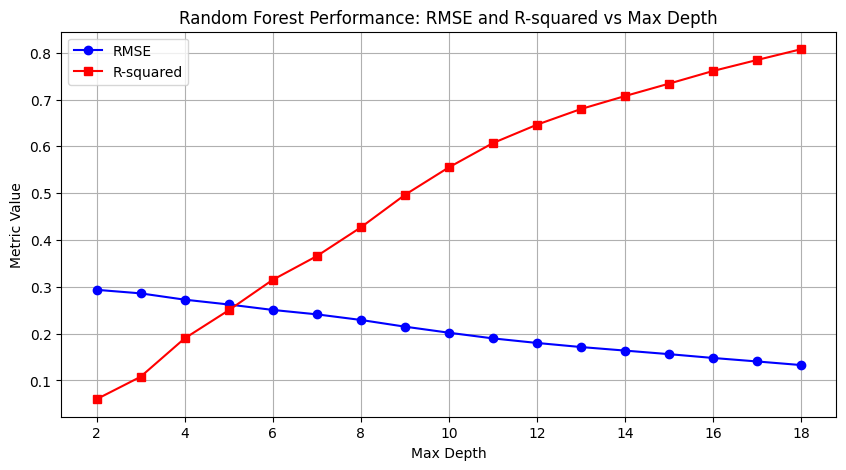

In [176]:
viz = plot_results(results_df = results)
viz

## Support vector machine

In [177]:
covariates = [col for col in train_df.columns if col != 'cost']
covariates

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'marital_status',
 'gender',
 'total_children',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cluster_tag',
 'food_department_mapped',
 'food_category_encoded',
 'food_department_encoded',
 'promotion_name_Bag Stuffers',
 'promotion_name_Best Savings',
 'promotion_name_Big Promo',
 'promotion_name_Big Time Discounts',
 'promotion_name_Big Time Savings',
 'promotion_name_Bye Bye Baby',
 'promotion_name_Cash Register Lottery',
 'promotion_name_Coupon Spectacular',
 'promotion_name_Dimes Off',
 'promotion_name_Dollar Cutters',
 'promotion_name_Dollar Days',
 'promotion_name_Doub

In [178]:
def fit_svr_model(train_df, test_df, response_variable, covariates, kernel='rbf', C=1.0, epsilon=0.1):
    """
    Fits a Support Vector Regression model using the specified kernel and evaluates it.

    Parameters:
    - train_df: pd.DataFrame, training dataset
    - test_df: pd.DataFrame, testing dataset
    - response_variable: str, name of the target column
    - covariates: list of str, feature column names
    - kernel: str, SVR kernel type ('linear', 'poly', 'rbf', 'sigmoid')
    - C: float, regularization parameter
    - epsilon: float, epsilon in the epsilon-SVR model

    Returns:
    - model: trained SVR model
    - metrics: dict containing RMSE and R² score
    """

    # Splitting input and target
    x_train = train_df[covariates]
    y_train = train_df[response_variable]
    x_test = test_df[covariates]
    y_test = test_df[response_variable]

    # Fit SVR model
    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics = {
        "RMSE": rmse,
        "R2_Score": r2
    }

    return model, metrics

In [179]:
model, metrics = fit_svr_model(train_df, test_df, 'cost', covariates, kernel='rbf', C=1.0, epsilon=0.1)

In [180]:
metrics

{'RMSE': 0.08778205604680844, 'R2_Score': 0.9159702101417813}